<a href="https://colab.research.google.com/github/faheems10/DiabetesClassifierPCA/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from skimage import color
from skimage import io
import os
import pandas as pd
from sklearn.metrics import confusion_matrix

## LOAD IN DATA

In [ ]:
data_orig = pd.read_csv('diabetes.csv')
data = data_orig[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
data.shape

(768, 8)

## Transform data

In [ ]:
from sklearn.preprocessing import MinMaxScaler  
scaling=MinMaxScaler()
scaling.fit_transform(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## Normalizing

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaling=StandardScaler()
ScaledData=Scaling.fit_transform(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

## **Calculate Covariance**


In [ ]:
Covar= ScaledData.T @ ScaledData
Covar.shape

(8, 8)

## Calculate EigenValues, EigenVectors

In [ ]:
D,V=np.linalg.eig(Covar)
print(D)


[1608.48379798 1329.569388    322.41882601  310.62685278  524.25860194
  585.4804881   672.40630564  790.75573953]


In [ ]:
D.shape

(8,)

In [ ]:
print(V)

[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]


In [ ]:
V.shape

(8, 8)

## **Calculate Principal Components**

In [ ]:
P=(ScaledData)@ V[:,:]

In [ ]:
P.shape

(768, 8)

In [ ]:
columns = data.columns

## **2-D Plot of all possible combinations**

In [ ]:
a = [i for i in range(1,8)]

In [ ]:
colors = ["blue","yellow"]

In [ ]:
rows,cols = 8,8
sp_names = ['Diabetes',"No Diabetes"]

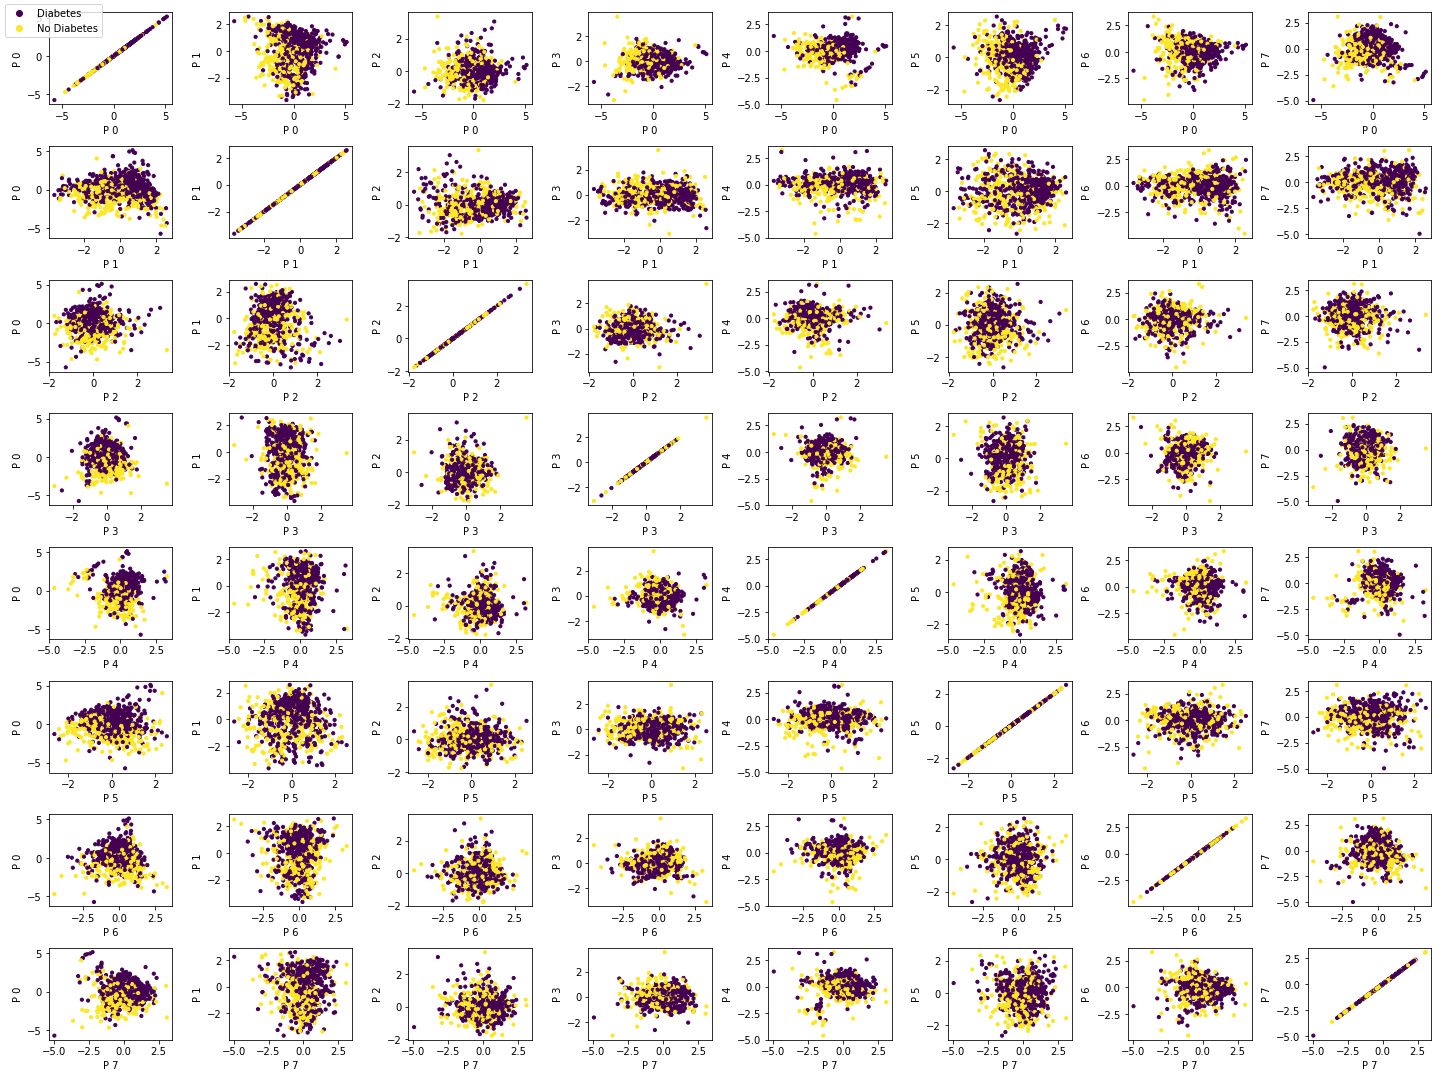

In [ ]:
fig,axes = plt.subplots(rows, cols, figsize=(20, 15))
for i in range(rows):
    for j in range(cols):
        if j == cols:
            break
        scatter = axes[i,j].scatter(P[:,i], P[:,j],c = data_orig["Outcome"].astype("int"),s = 10)
        fig.tight_layout()
        axes[i,j].set_xlabel("P " + str(i))
        axes[i,j].set_ylabel("P " + str(j))
fig.legend(handles=scatter.legend_elements()[0], labels = sp_names,loc = 'upper left')
plt.show()

The best split is seen with P0 and P5 and P0 and P1

In [ ]:
cols = ["P" + str(i) for i in range(8)]
cols

['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']

In [ ]:
pComponents = pd.DataFrame(P,columns=cols)
pComponents["Outcome"] = data_orig["Outcome"]
pComponents["Outcome-String"] = ["Diabetes" if x ==1 else "No-Diabetes" for x in pComponents["Outcome"]]

<AxesSubplot:xlabel='P0', ylabel='P5'>

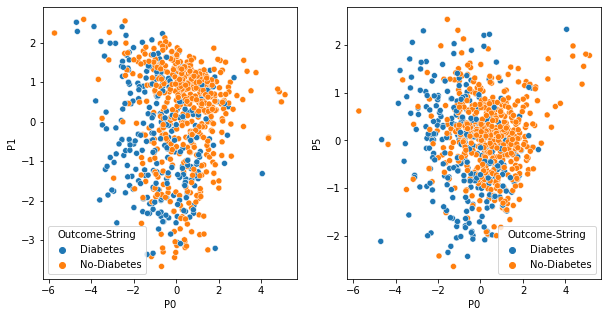

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.scatterplot(x = "P0",y = "P1",hue = "Outcome-String",data = pComponents)
plt.subplot(1,2,2)
sns.scatterplot(x = "P0",y = "P5",hue = "Outcome-String",data = pComponents)

## PCA USING PYTHON Module

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
x_pca = pca.fit_transform(ScaledData)

In [ ]:
x_pca.shape

(768, 8)

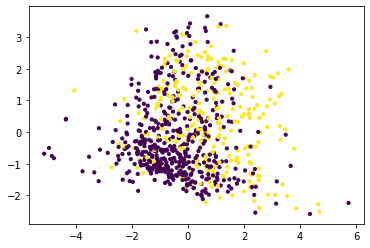

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c = data_orig["Outcome"],s = 10)


## **Explained Variance Ratio**

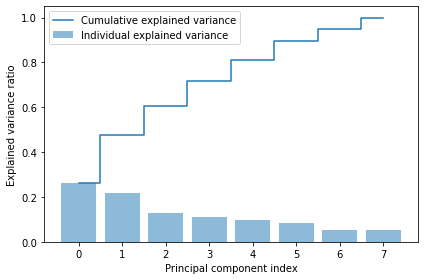

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## **Training & Testing Data** 

Model is split into training and testing

In [ ]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data_orig["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ScaledData,y,test_size=0.2, random_state=42)
len(X_train)

len(X_test)

X_train

array([[-0.54791859, -1.15469351, -3.57259724, ..., -4.06047387,
        -0.50700636, -1.04154944],
       [ 1.53084665, -0.27837344,  0.66661825, ..., -0.48135115,
         2.44666971,  1.4259954 ],
       [-0.84488505,  0.56664949, -1.19450074, ..., -0.41789153,
         0.55003518, -0.95646168],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

## **Decision Tree** 

In [ ]:
# pip install scikit-learn==0.22.1 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.7532467532467533

A confusion matrix is plotted to show false negatives, true negatives, false positives and true positives

<AxesSubplot:>

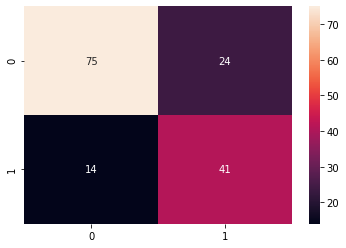

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot = True)

## **K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn.score(X_test, y_test)

0.7402597402597403

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[86, 13],
       [27, 28]], dtype=int64)

A confusion matrix is plotted to show false negatives, true negatives, false positives and true positives

<AxesSubplot:>

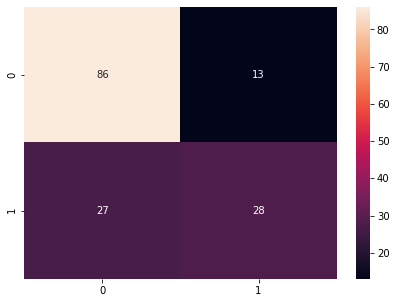

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)

## **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = "linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
svm.score(X_test, y_test)

0.7597402597402597

A confusion matrix is plotted to show false negatives, true negatives, false positives and true positives

<AxesSubplot:>

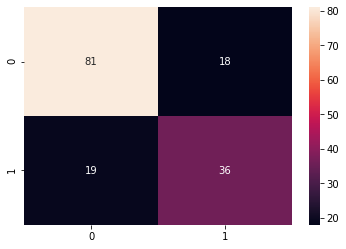

In [ ]:
cm = confusion_matrix(y_test,svm.predict(X_test))
sns.heatmap(cm,annot = True)